In [1]:
 #importing libraries
import pandas as pd
import numpy as np
#For plotting
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import csv

In [2]:
pip install plotly

In [3]:
!pip install plotly dash jupyter-dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [4]:
#importing libraries
import plotly.graph_objects as go
from math import sqrt
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash

In [5]:
#Reading the dataset
input_file_name=input("Enter the input file path: ")
data1=pd.read_csv(input_file_name,names=['ppm','Intensities'])
data1.reset_index(drop=True, inplace=True)
data1

Enter the input file path: /content/25mM.csv


,ppm,Intensities
0,-5.000000,0.986957
1,-4.857143,0.986413
2,-4.714286,0.985870
3,-4.571429,0.984938
4,-4.428571,0.983851
...,...,...
101,9.428571,0.993866
102,9.571429,0.991615
103,9.714286,0.990994
104,9.857143,0.992236


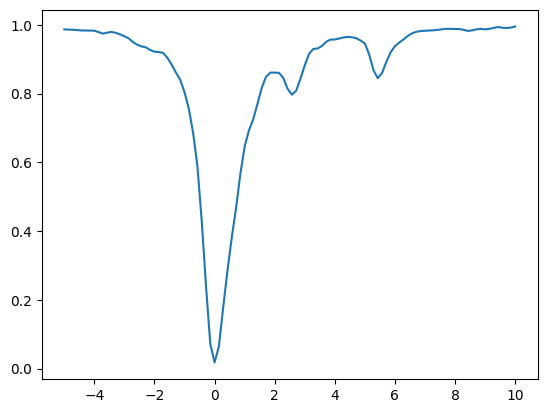

In [6]:
#plotting the input file
plt.plot(data1["ppm"],data1["Intensities"])

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1["ppm"], y=data1["Intensities"], mode='lines+markers'))
fig.update_layout(
      title='Intensities vs offset graph',
      xaxis_title='offset',
      yaxis_title='Intensities')
fig.show()

In [8]:
#defing the necessary functions needed for three pool curve fitting

def peak(data,Intensity):
  I=data[Intensity]
  ppm=data["ppm"]
  positions=[]
  indices=[]
  Inten={}
  for i in range(1,len(I)-1):
    if I[i-1]>=I[i] and I[i]<=I[i+1]:
      positions+=[data["ppm"][i]]
      indices+=[i]
      Inten[data["ppm"][i]]=I[i]
  for i in range(2, len(I)-2):
    if I[i-2]>=I[i] and I[i]<=I[i+2]:
      if data["ppm"][i] not in positions:
        positions+=[data["ppm"][i]]
        indices+=[i]
        Inten[data["ppm"][i]]=I[i]
  positions.sort()
  indices.sort()
  return positions,indices,Inten

def data_plot(data,I):
  positions=peak(data,I)[0]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data["ppm"], y=data[I], mode='lines+markers'))
  for i in range(len(positions)):
    lim_0=0
    lim_1=1.1
    l_y=[]
    l_x=[]
    while lim_0<=lim_1:
      l_y+=[lim_0]
      l_x+=[positions[i]]
      lim_0+=0.05
    #print(l_y)
    fig.add_trace(go.Scatter(x=l_x, y=l_y, mode='lines+markers',name=str(i)))
  fig.show()
  return positions

def interactive_plot(data,peak_positions,I):
  x=data["ppm"]
  y=data[I]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))
  fig.add_shape(
      type="line",
      x0=peak_positions[0],
      x1=peak_positions[0],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.add_shape(
      type="line",
      x0=peak_positions[1],
      x1=peak_positions[1],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.add_shape(
      type="line",
      x0=peak_positions[2],
      x1=peak_positions[2],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.update_layout(
      title='Intensities vs offset graph',
      xaxis_title='offset',
      yaxis_title='Intensities')

  fig.show()

In [9]:
#function for getting the tracer (indexes) for the peaks
data_plot_1=data_plot(data1,"Intensities")

In [10]:
 #defining the three peak positions (x1,x2 and x3)/ Offset values
p1=int(input("enter the tracer for x1: "))
p2=int(input("enter the tracer for x2: "))
p3=int(input("enter the tracer for x3: "))
x1=peak(data1,"Intensities")[0][p1]
x2=peak(data1,"Intensities")[0][p2]
x3=peak(data1,"Intensities")[0][p3]
print(x1,x2,x3)

enter the tracer for x1: 1
enter the tracer for x2: 3
enter the tracer for x3: 5
0.0 2.571428571 5.428571429


In [11]:
peak_positions_1=[data_plot_1[p1],data_plot_1[p2],data_plot_1[p3]]
peak_positions_1

[0.0, 2.571428571, 5.428571429]

In [12]:
#plot with the marked peaks
interactive_plot(data1,peak_positions_1,"Intensities")

In [13]:
#Calculating the amplitdes for the peaks
avg_=[]
for i in range(len(data1["Intensities"])-1,len(data1["Intensities"])-11,-1):
  avg_+=[data1["Intensities"][i]]

avg2=np.average(avg_)
avg2

dic=peak(data1,"Intensities")[2]
A=[]
for i in peak_positions_1:

  A+=[-dic[i]+avg2]
A

[0.9727747900000001, 0.19374223600000007, 0.14560559000000017]

In [14]:
#following code only works once, restartsession whenever you need to use it again
#This is the code that needed for calculating the fwhm (Full Width of Half Maxima)
#Click on 2 points in the images where a query for calculating the distance between 2 points is present (Chose any of the last two images)
#click on any points for which you need to calculate the distance between them

data64=data1
app = JupyterDash(__name__)
i1=p1
i2=p2
i3=p3
I="Intensities"
x=data64["ppm"]
y=data64["Intensities"]
i=min(x)
j=max(x)
x_coord=[]
base_line=[]
y_coord1=[]
y_coord2=[]
y_coord3=[]
while i<=j:
  x_coord+=[i]
  base_line+=[y.iloc[len(y)-1]]
  y_coord1+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i1]])/2]
  y_coord2+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i2]])/2]
  y_coord3+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i3]])/2]
  i+=(1/50)

k=min(y)
peak_1x=[]
peak_2x=[]
peak_3x=[]
peak_y=[]
while k<=1.05:
  peak_y+=[k]
  peak_1x+=[data64["ppm"][peak(data64,I)[1][i1]]]
  peak_2x+=[data64["ppm"][peak(data64,I)[1][i2]]]
  peak_3x+=[data64["ppm"][peak(data64,I)[1][i3]]]
  k+=(1/200)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=base_line, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord1, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord2, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord3, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_1x, y=peak_y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_2x, y=peak_y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_3x, y=peak_y, mode='lines+markers'))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='ppm',yaxis_title='Intensities')
fig.show()

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='scatter-plot', figure=fig),
    html.Div(id='output')
])

# Initialize a list to store clicked points
clicked_points = []

@app.callback(
    Output('output', 'children'),
    Input('scatter-plot', 'clickData')
)
def display_click_data(clickData):
    global clicked_points
    if clickData:
        point = clickData['points'][0]
        clicked_points.append((point['x'], point['y']))
        if len(clicked_points) == 2:
            x0, y0 = clicked_points[0]
            x1, y1 = clicked_points[1]
            distance = sqrt((x1 - x0) ** 2 + (y1 - y0) ** 2)
            clicked_points = []  # Reset after calculating the distance
            return f'Distance between points: {distance:.2f}'
    return "Click on two points to calculate the distance."

# Run the Dash app in Colab
app.run_server(mode='inline',port=8050)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
R1=float(input("Enter fwhm1: "))
R2=float(input("Enter fwhm2: "))
R3=float(input("Enter fwhm3: "))

Enter fwhm1: 1.26
Enter fwhm2: 0.98
Enter fwhm3: 0.74


In [16]:
def lorentzian(x,A,r,x1):
  L= (A*r)/(((x-x1)**2+r**2)*np.pi)
  return L

In [17]:
def bound(lower,upper,step):
  l=[]
  while lower<=upper:
    l+=[lower]
    lower+=step
  return l

def boundaries(A,r):
  r1=r/2
  B_A=bound(A-1.1,A+1.1,1/20)
  B_r=bound(r1-0.05,r1+0.05,1/40)
  return B_A,B_r

def error(data,A,r,off):
  x=data["ppm"]
  y=data["Intensities"]
  y_fit=lorentzian(x,A,r,off)
  error=0
  for i in range(len(x)):
    if x[i] == off:
      print(A,",",r,",",off,"   ",y_fit[i],"   ",y[i],"   ",(avg2-y_fit[i])-y[i])
      error+=((avg2-y_fit[i])-y[i])**2
  error1=np.sum(((avg2-y_fit)-(y))**2)
  return error,error1

def para(data,A,r,pe):
  x=data["ppm"]
  y=data["Intensities"]
  liste1=[]
  liste2=[]
  e={}
  val={}
  for i in range(len(A)):
    for j in range(len(r)):
      err=error(data,A[i],r[j],pe)
      liste1+=[err[0]]
      liste2+=[err[1]]
      e[err[0]]=err[1]
      val[err[1]]=[A[i],r[j],pe]
      #print(i,j,err[0],err[1],A[i],"\n")

  liste1.sort()
  listf1=liste1[0:10]
  listf2=[]
  for i in listf1:
    listf2+=[e[i]]
  mini=min(listf2)
  print(val[mini])
  for i in listf1:
    if e[i]==mini:
      print(i,mini)
  return val[mini]

In [18]:
print(A,R1,R2,R3,x1,x2,x3)

[0.9727747900000001, 0.19374223600000007, 0.14560559000000017] 1.26 0.98 0.74 0.0 2.571428571 5.428571429


In [19]:
b=boundaries(A[0],R1)
p=para(data64,b[0],b[1],x1)
p

-0.12722520999999998 , 0.58 , 0.0     -0.06982248640484287     0.017861856     1.042597276404843
-0.12722520999999998 , 0.605 , 0.0     -0.06693725969389895     0.017861856     1.0397120496938992
-0.12722520999999998 , 0.63 , 0.0     -0.06428101922985534     0.017861856     1.0370558092298556
-0.12722520999999998 , 0.655 , 0.0     -0.06182754521344863     0.017861856     1.0346023352134488
-0.12722520999999998 , 0.68 , 0.0     -0.05955447369824831     0.017861856     1.0323292636982486
-0.07722520999999997 , 0.58 , 0.0     -0.042381978975205736     0.017861856     1.015156768975206
-0.07722520999999997 , 0.605 , 0.0     -0.0406306575299493     0.017861856     1.0134054475299494
-0.07722520999999997 , 0.63 , 0.0     -0.0390183298501894     0.017861856     1.0117931198501897
-0.07722520999999997 , 0.655 , 0.0     -0.037529080619266145     0.017861856     1.0103038706192664
-0.07722520999999997 , 0.68 , 0.0     -0.03614933500826371     0.017861856     1.008924125008264
-0.0272252099999999

[1.8727747900000011, 0.63, 0.0]

In [20]:
x=data64["ppm"]
y=data64["Intensities"]
y_fit1=lorentzian(data64["ppm"],p[0],p[1],p[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit1, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [21]:
b1=boundaries(A[1],R2)
p1=para(data64,b1[0],b1[1],x2)
p1

-0.906257764 , 0.44 , 2.571428571     -0.6556154675273105     0.79689441     0.8493577035273107
-0.906257764 , 0.465 , 2.571428571     -0.6203673241118637     0.79689441     0.8141095601118639
-0.906257764 , 0.49000000000000005 , 2.571428571     -0.5887159300245237     0.79689441     0.7824581660245237
-0.906257764 , 0.515 , 2.571428571     -0.5601374868194497     0.79689441     0.7538797228194497
-0.906257764 , 0.54 , 2.571428571     -0.5342051957629939     0.79689441     0.7279474317629938
-0.856257764 , 0.44 , 2.571428571     -0.6194438895518797     0.79689441     0.8131861255518796
-0.856257764 , 0.465 , 2.571428571     -0.5861404546297356     0.79689441     0.7798826906297357
-0.856257764 , 0.49000000000000005 , 2.571428571     -0.5562353293935246     0.79689441     0.7499775653935247
-0.856257764 , 0.515 , 2.571428571     -0.5292336143744216     0.79689441     0.7229758503744216
-0.856257764 , 0.54 , 2.571428571     -0.5047320581533835     0.79689441     0.6984742941533836
-0.806

[0.34374223600000026, 0.54, 2.571428571]

In [22]:
y_fit2=lorentzian(data64["ppm"],p1[0],p1[1],p1[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit2, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [23]:
b2=boundaries(A[2],R3)
p2=para(data64,b2[0],b2[1],x3)
p2

-0.9543944099999999 , 0.32 , 5.428571429     -0.9493536750673315     0.845031056     1.0949592650673319
-0.9543944099999999 , 0.34500000000000003 , 5.428571429     -0.8805599304972347     0.845031056     1.0261655204972349
-0.9543944099999999 , 0.37000000000000005 , 5.428571429     -0.8210626378960701     0.845031056     0.9666682278960702
-0.9543944099999999 , 0.3950000000000001 , 5.428571429     -0.7690966481558126     0.845031056     0.9147022381558129
-0.9043944099999999 , 0.32 , 5.428571429     -0.8996177553511141     0.845031056     1.0452233453511144
-0.9043944099999999 , 0.34500000000000003 , 5.428571429     -0.8344280629343666     0.845031056     0.9800336529343666
-0.9043944099999999 , 0.37000000000000005 , 5.428571429     -0.7780477884117741     0.845031056     0.9236533784117743
-0.9043944099999999 , 0.3950000000000001 , 5.428571429     -0.7288042574996365     0.845031056     0.8744098474996366
-0.8543944099999998 , 0.32 , 5.428571429     -0.8498818356348967     0.845031056

[0.19560559000000044, 0.3950000000000001, 5.428571429]

In [24]:
y_fit3=lorentzian(data64["ppm"],p2[0],p2[1],p2[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit3, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [25]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=data64["Intensities"], mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
#ig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit, mode='lines',line_shape="spline",name="Fitted plot"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit1, mode='lines',line_shape="spline",name="Fitted plot"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit2, mode='lines',line_shape="spline",name="Fitted plot"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit3, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [26]:
#defining the three pool lorentzian function
def lorentz(x,A1,A2,A3,r1,r2,r3,x1,x2,x3):
  L= (A1*r1)/(((x-x1)**2+r1**2)*np.pi)  +  (A2*r2)/(((x-x2)**2+r2**2)*np.pi) +(A3*r3)/(((x-x3)**2+r3**2)*np.pi)
  return L

In [27]:
def bound(lower,upper,step):
  l=[]
  while lower<=upper:
    l+=[lower]
    lower+=step
  return l

def boundaries(A1,A2,A3,r1,r2,r3):
  B_A1=bound(A1-0.05,A1+0.05,1/20)
  B_A2=bound(A2-0.1,A2+0.05,1/40)
  B_A3=bound(A3-0.1,A3+0.05,1/40)
  B_r1=bound(r1-0.05,r1+0.05,1/40)
  B_r2=bound(r2-0.05,r2+0.05,1/40)
  B_r3=bound(r3-0.05,r3+0.05,1/40)
  return B_A1,B_A2,B_A3,B_r1,B_r2,B_r3

def error(data,A1,A2,A3,r1,r2,r3,x1,x2,x3):
  x=data["ppm"]
  y=data["Intensities"]
  y_fit=lorentz(x,A1,A2,A3,r1,r2,r3,x1,x2,x3)
  error1=np.sum(((avg2-y_fit)-(y))**2)
  error=0
  loc=[x1,x2,x3]
  for i in range(len(x)):
    if x[i] in loc:
      error+=((avg2-y_fit[i])-y[i])**2
  return error,error1

def para(data,A1,A2,A3,r1,r2,r3,x1,x2,x3):
  liste1=[]
  liste2=[]
  list2=[]
  e={}
  val={}
  x=data["ppm"]
  y=data["Intensities"]
  for i in range(len(A1)):
    for j in range(len(A2)):
      for k in range(len(A3)):
        for l in range(len(r1)):
          for m in range(len(r2)):
            for n in range(len(r3)):
              err=error(data,A1[i],A2[j],A3[k],r1[l],r2[m],r3[n],x1,x2,x3)
              liste1+=[err[0]]
              liste2+=[err[1]]
              e[err[0]]=err[1]
              val[err[1]]=[A1[i],A2[j],A3[k],r1[l],r2[m],r3[n]]
              print(i,j,k,l,m,n,"   ",err[0]," ",err[1])
              #list2+=[[A1[i],A2[j],A3[k],r1[l],r2[m],r3[n]]]

  liste1.sort()
  listf1=liste1[0:10]
  listf2=[]
  for i in listf1:
    listf2+=[e[i]]
  mini=min(listf2)
  print(val[mini])
  for i in listf1:
    if e[i]==mini:
      print(i,mini)
  return val[mini]

In [28]:
print(p,p1,p2)

[1.8727747900000011, 0.63, 0.0] [0.34374223600000026, 0.54, 2.571428571] [0.19560559000000044, 0.3950000000000001, 5.428571429]


In [29]:
b=boundaries(p[0],p1[0],p2[0],p[1],p1[1],p2[1])
b

([1.822774790000001, 1.8727747900000011, 1.9227747900000012],
 [0.24374223600000025,
  0.26874223600000025,
  0.29374223600000027,
  0.3187422360000003,
  0.3437422360000003,
  0.36874223600000033],
 [0.09560559000000043,
  0.12060559000000043,
  0.14560559000000042,
  0.17060559000000042,
  0.1956055900000004,
  0.2206055900000004,
  0.2456055900000004],
 [0.58, 0.605, 0.63, 0.655, 0.68],
 [0.49000000000000005, 0.515, 0.54, 0.5650000000000001, 0.5900000000000001],
 [0.3450000000000001,
  0.3700000000000001,
  0.39500000000000013,
  0.42000000000000015])

In [30]:
p3=para(data64,b[0],b[1],b[2],b[3],b[4],b[5],p[2],p1[2],p2[2])

Streaming output truncated to the last 5000 lines.
1 4 6 0 0 2     0.015916773116258165   0.2201121883090924
1 4 6 0 0 3     0.014445064270490027   0.21746399575219902
1 4 6 0 1 0     0.019115348208487815   0.22357125559545438
1 4 6 0 1 1     0.016350673173300696   0.21898061636566404
1 4 6 0 1 2     0.014324644597797255   0.21547431381048449
1 4 6 0 1 3     0.012840900957539519   0.21281204096435838
1 4 6 0 2 0     0.017908108623528825   0.2197388691257288
1 4 6 0 2 1     0.01512971844688937   0.21513430081290766
1 4 6 0 2 2     0.01309117817214741   0.21161391783357994
1 4 6 0 2 3     0.011595918560298336   0.20893742761854286
1 4 6 0 3 0     0.016985043999921418   0.21655981324500787
1 4 6 0 3 1     0.014193426373113976   0.211941164239079
1 4 6 0 3 2     0.012142847950307872   0.2084065637626703
1 4 6 0 3 3     0.010636533665363669   0.20571573346497762
1 4 6 0 4 0     0.01628936581371966   0.2139329923600032
1 4 6 0 4 1     0.013484961013213385   0.20930012559643937
1 4 6 0 4 2   

In [31]:
p3

[1.822774790000001,
 0.24374223600000025,
 0.14560559000000042,
 0.605,
 0.5650000000000001,
 0.3700000000000001]

In [32]:
y_fit_f=lorentz(x,p3[0],p3[1],p3[2],p3[3],p3[4],p3[5],x1,x2,x3)

In [33]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit_f, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [34]:
fit=[]
for i in range(len(y)):
  fit+=[y[len(y)-1]-y_fit_f[i]]
fit1=y_fit_f

In [35]:
#function for getting the csv file with the fitted values of the raw data
filename = "final_fitted_data.csv"


fields = ["offset","Intensities","Lorentzian"]

rows = []
for i in range(len(fit)):
  rows+=[[data64["ppm"][i],fit[i],fit1[i]]]

with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

In [36]:
data_pablo=pd.read_csv("final_fitted_data.csv")

In [37]:
data_pablo

,offset,Intensities,Lorentzian
0,-5.000000,0.980663,0.014756
1,-4.857143,0.979816,0.015603
2,-4.714286,0.978893,0.016526
3,-4.571429,0.977886,0.017533
4,-4.428571,0.976784,0.018635
...,...,...,...
101,9.428571,0.989498,0.005921
102,9.571429,0.989723,0.005696
103,9.714286,0.989933,0.005486
104,9.857143,0.990131,0.005288


In [38]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data64["Intensities"], mode='markers',name="Input Data plot"))
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data_pablo["Lorentzian"], mode='markers+lines',name="Lorentzian"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data_pablo["Intensities"], mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()